### **Data Discord**
##### Structure of the DataFrame :
- ID : id of the message from discord (unique key)
- Name : discord username or channel ({channel_name} in {guild_name})
- Type : type of message channel (DM, GROUP_DM, GUILD_TEXT, GUILD_VOICE, PUBLIC_THREAD)
- Timestamp : date in %Y-%m-%d %H:%M:%S format
- Contents : content of the message
- Attachments : image, file link to the message

In [1]:
import json
import os
import re
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from collections import defaultdict
from fonctions import *
from collections import Counter
from textblob import TextBlob
from tabulate import tabulate
df = pd.read_csv("discord_messages.csv")

In [3]:
# extract_zip("package_sola.zip")

In [ ]:
INDEX_PATH = "package/messages/index.json"
MESSAGES_PATH = "package/messages"

conversation_names = get_conversion_name_dict(INDEX_PATH)
df = create_dataframe(MESSAGES_PATH, conversation_names)
df.to_csv("discord_messages.csv", index=False)

## Global all time

In [3]:
top_10_messages(df)

╒══════════╤══════════════════════════════╤══════════════════════════════════╤═══════════════════════════════════════════════╤═════════════════════════════════════════════════════╕
│ TOP 10   │ DM                           │ GROUP_DM                         │ GUILD_TEXT                                    │ PUBLIC_THREAD                                       │
╞══════════╪══════════════════════════════╪══════════════════════════════════╪═══════════════════════════════════════════════╪═════════════════════════════════════════════════════╡
│          │ solafleur - 296 672          │ Peaky Blindés ඞ - 23 564         │ -mudae-2 in Virgule du 4' - 102 264           │ sad in Virgule du 4' - 408                          │
├──────────┼──────────────────────────────┼──────────────────────────────────┼───────────────────────────────────────────────┼─────────────────────────────────────────────────────┤
│          │ jooojx - 37 019              │ Only Banger - 8 594              │ -les-bros-généra

In [2]:
df['len'] = df['Contents'].str.len()

0          Sabri — Today at 21:04\nkatarina fiora wukong/...
1                                                      yuumi
2                                                  Xerath xd
3                                                       Tahm
4                                                     Gragas
                                 ...                        
1102310                 J'croyais il était resté sur le quai
1102311                                            Dinguerie
1102312                        Ah mais y a dinoz dans le bus
1102313                                       Il sleep sbr ?
1102314                                   T'as des prises nn
Name: Contents, Length: 1102315, dtype: object

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine the data into a dataframe for a better view
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Display columns with missing values
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
Contents,7639,0.692996


In [ ]:

df_type = df[df['Type'] == "DM"]
df_type["len"] = df_type["Contents"].apply(lambda x: len(x) if isinstance(x, str) else 0)
count = df_type.groupby('Timestamp')['len'].sum()

smoothed_data = count.rolling(window=50, min_periods=1).mean()
sns.lineplot(x=smoothed_data.index, y=smoothed_data.values, label="DM")

plt.title('Number of Messages by Type Over Time (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\NATHAN\AppData\Local\Temp\ipykernel_20244\2020801964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type["len"] = df_type["Contents"].apply(lambda x: len(x) if isinstance(x, str) else 0)


KeyboardInterrupt: 

In [2]:
message_statistics(df)

╒═══════════════╤═════════╤══════════════╤══════════════════╕
│ Type          │ Count   │ Percentage   │ Median Size      │
╞═══════════════╪═════════╪══════════════╪══════════════════╡
│ DM            │ 468 384 │ 42.49 %      │ 21.00 characters │
├───────────────┼─────────┼──────────────┼──────────────────┤
│ GROUP_DM      │ 57 265  │ 5.19 %       │ 22.00 characters │
├───────────────┼─────────┼──────────────┼──────────────────┤
│ GUILD_TEXT    │ 576 044 │ 52.26 %      │ 3.00 characters  │
├───────────────┼─────────┼──────────────┼──────────────────┤
│ PUBLIC_THREAD │ 610     │ 0.06 %       │ 3.00 characters  │
╘═══════════════╧═════════╧══════════════╧══════════════════╛


hii
hii
hii
hii


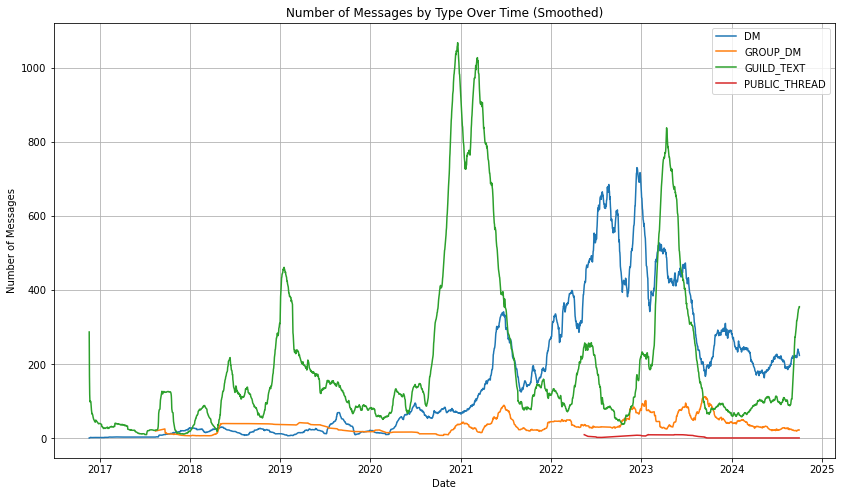

In [2]:
plot_message_statistics(df, window=50, type="character")

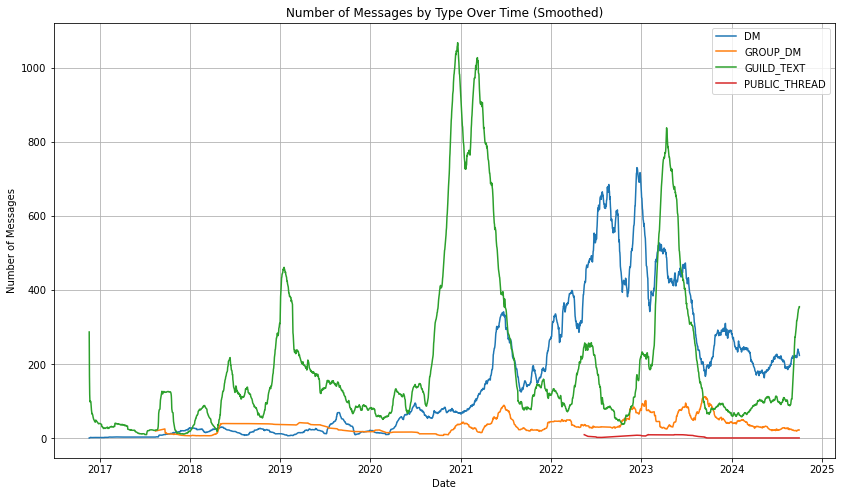

In [5]:
plot_message_statistics(df, window=50)

In [ ]:
taille_message(df)

In [ ]:
stop_words = {"je", "tu", "il", "elle", "on", "nous", "vous", "ils", "elles",
              "le", "la", "les", "l'", "au", "aux", "du", "des", "de", "un", "une",
              "mon", "ma", "mes", "ton", "ta", "tes", "son", "sa", "ses", "ce", "cette", "ces", "moi", "toi",
              "quel", "quelle", "quels", "quelles", "que", "quoi", "qui", "quand", "dont", "où",
              "mais", "ou", "et", "donc", "or", "ni", "car", "ne", "pas", "sans", "si", "plus", "moins", "ni",
              "ça", "ca", "en", "a", "est", "à", "y", "suis", "es", "sommes", "êtes", "sont", "ai", "as", "avons", "avez", "ont",
              "c'est", "j'ai", "va", "t'as", "me", "sur", "là", "oe", "avec", "coup", "enfin",
              "pour", "bien", "dans", "oui", "ouais", "non", "nn", "nan", "bon", "dans", "fait", "tout", "comme", "même",
              "après", "avant", "j'suis", "trop", "c'était", "vraiment", "genre", "faire", "vrai", "juste", "aussi", "peu",
              "te", "t'aime", "veux", "y'a", "sais", "dit", "t'es", "alors", "peux", "rien", "dire", "fais", "pcq"
        }
import pandas as pd
from collections import Counter

def clean_and_count(text, word_counts, stop_words):
    '''
    Clean and normalize the text: lowercase and count words.
    '''

    cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace() or char == "'").lower()
    words = cleaned_text.split()
    for word in words:
        if word not in stop_words:
            word_counts[word] += 1

def analyze_word_usage(df):
    '''
    Analyze the most frequently used words in the 'Contents' column of the DataFrame.
    '''

    word_counts = Counter()
    df['Contents'].apply(lambda text: clean_and_count(text, word_counts, stop_words))

    most_common_words = word_counts.most_common(10)
    print("Most frequently used words:")
    for word, count in most_common_words:
        print(f"{word}: {count}")

analyze_word_usage(df[df["Name"] == "nathsus"])


## Certain Date

Top 10 since a certain date

In [ ]:
top_10_messages(df_date(df))

In [ ]:
df[df["Timestamp"] == df["Timestamp"].max()]["Contents"].values[0]